In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [135]:
#importing dataset

df=pd.read_csv("titanic.csv")

In [136]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
# Handling Missing values

df=df.drop(["PassengerId","Name","Ticket"],axis=1)

# Encode categorical columns

df["Sex"]=df["Sex"].map({"male":0,"female":1})

# Encode using LabelEncoder

embarked=LabelEncoder()
df["Embarked"]= embarked.fit_transform(df["Embarked"].astype(str))

# Simplify Cabin then encode

df["Cabin"]= df["Cabin"].astype(str).str[0]
cabin=LabelEncoder()
df["Cabin"]= cabin.fit_transform(df["Cabin"])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,8,2
1,1,1,1,38.0,1,0,71.2833,2,0
2,1,3,1,26.0,0,0,7.9250,8,2
3,1,1,1,35.0,1,0,53.1000,2,2
4,0,3,0,35.0,0,0,8.0500,8,2


In [138]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [139]:
df.describe()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,6.716049,1.538721
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,2.460739,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,8.000000,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,8.000000,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,8.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,8.000000,3.000000


In [140]:
#Filling missing values

df["Age"].fillna(df["Age"].median(),inplace=True)

In [141]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,6.716049,1.538721
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,2.460739,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,8.000000,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,8.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,8.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,8.000000,3.000000


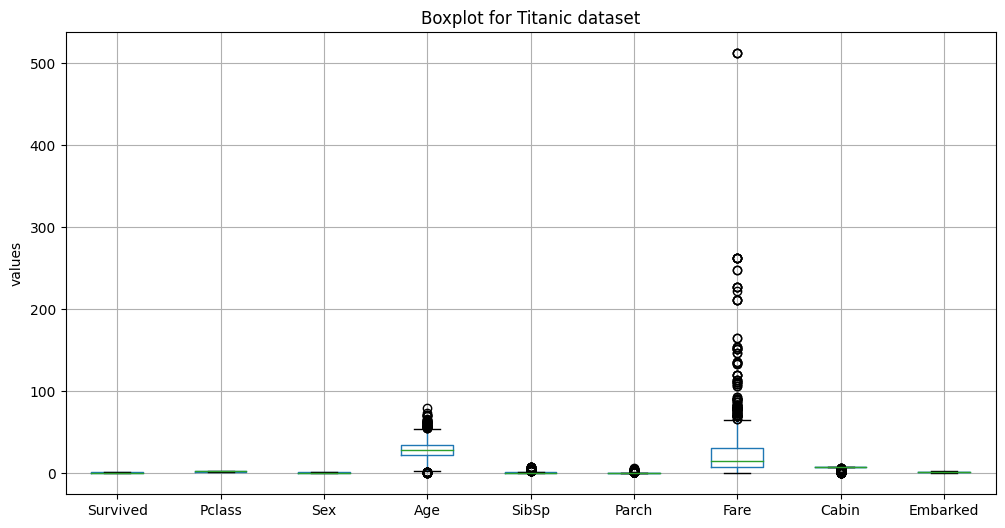

In [142]:
# Checking for Outliers

plt.figure(figsize=(12,6))
df.boxplot()
plt.title("Boxplot for Titanic dataset")
plt.ylabel("values")
plt.show()

In [143]:
# Checking and removing outliers

numeric_df=df.select_dtypes(include=["number"])

Q1=numeric_df.quantile(0.25)
Q2=numeric_df.quantile(0.75)
IQR=Q2-Q1

no_outliers=df[(numeric_df >= Q1 - 1.5 * IQR) & (numeric_df <= Q1 + 1.5 * IQR)]

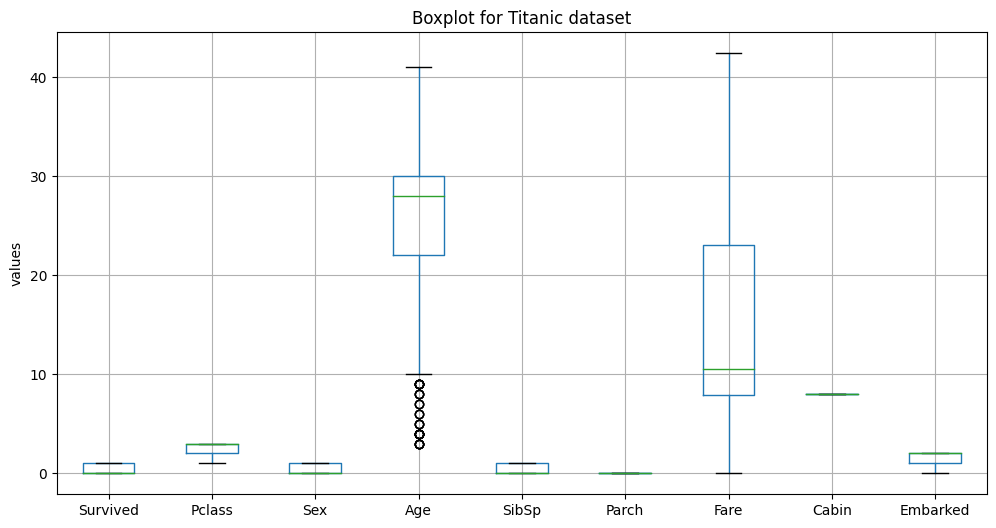

In [151]:
# Again Checking Outliers

plt.figure(figsize=(12,6))
no_outliers.boxplot()
plt.title("Boxplot for Titanic dataset")
plt.ylabel("values")
plt.show()

In [145]:
# Applying MinMaxScaler

scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(no_outliers),columns=no_outliers.columns)

df_scaled

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,1.0,0.0,0.500000,1.0,0.0,0.170991,0.0,1.0
1,1.0,0.0,1.0,0.921053,1.0,0.0,NaN,NaN,0.0
2,1.0,1.0,1.0,0.605263,0.0,0.0,0.186910,0.0,1.0
3,1.0,0.0,1.0,0.842105,1.0,0.0,NaN,NaN,1.0
4,0.0,1.0,0.0,0.842105,0.0,0.0,0.189858,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.631579,0.0,0.0,0.306604,0.0,1.0
887,1.0,0.0,1.0,0.421053,0.0,0.0,0.707547,NaN,1.0
888,0.0,1.0,1.0,0.657895,1.0,NaN,0.553066,0.0,1.0
889,1.0,0.0,0.0,0.605263,0.0,0.0,0.707547,NaN,0.0


In [152]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,6.716049,1.538721
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,2.460739,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,8.000000,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,8.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,8.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,8.000000,3.000000


In [147]:
# Selecting Target and Feature Column

X = df.drop("Survived", axis=1)
y = df["Survived"]

In [148]:
#Applying Train_Test_Split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [149]:
# Training the Model

model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [150]:
# Evaluating the model

y_pred= model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

print("Classification Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.8212290502793296
Confusion Matrix:
 [[91 14]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

